历史k线最高与最低价相关系数平均值

In [1]:
import polars as pl
import numpy as np

# 读取数据
data = pl.read_parquet("hourly_data.pa")

df = data.sort('open_time').sort('symbol')

# 设置窗口大小 N
N = 50

# 计算相关系数的函数
def rolling_corr(high, low):
    return np.corrcoef(high, low)[0, 1]

# 使用 groupby 进行分组并计算滚动窗口的相关系数
def calculate_rolling_corr(group):
    high_series = group["high"].to_numpy()
    low_series = group["low"].to_numpy()

    rolling_correlations = []
    for i in range(N - 1, len(high_series)):
        high_window = high_series[i - N + 1:i + 1]
        low_window = low_series[i - N + 1:i + 1]
        correlation = rolling_corr(high_window, low_window)
        rolling_correlations.append(correlation)

    return pl.DataFrame({
        "open_time": group["open_time"][N - 1:],
        "symbol": group["symbol"][N - 1:],
        "correlation": rolling_correlations
    })

# 使用groupby进行分组并应用函数
result_df = df.groupby("symbol").apply(calculate_rolling_corr).sort('open_time').sort('symbol')

# 打印结果
print(result_df)



/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_1355/3531011839.py:35: DeprecationWarning: `groupby` is deprecated. It has been renamed to `group_by`.
  result_df = df.groupby("symbol").apply(calculate_rolling_corr).sort('open_time').sort('symbol')
/var/folders/8p/_lylf4tn2yz39y4qkw9vg1jw0000gn/T/ipykernel_1355/3531011839.py:35: DeprecationWarning: `apply` is deprecated. It has been renamed to `map_groups`.
  result_df = df.groupby("symbol").apply(calculate_rolling_corr).sort('open_time').sort('symbol')


shape: (2_476_035, 3)
┌─────────────────────┬──────────────┬─────────────┐
│ open_time           ┆ symbol       ┆ correlation │
│ ---                 ┆ ---          ┆ ---         │
│ datetime[μs]        ┆ str          ┆ f64         │
╞═════════════════════╪══════════════╪═════════════╡
│ 2022-09-11 14:00:00 ┆ 1000LUNCUSDT ┆ 0.399776    │
│ 2022-09-11 15:00:00 ┆ 1000LUNCUSDT ┆ 0.685428    │
│ 2022-09-11 16:00:00 ┆ 1000LUNCUSDT ┆ 0.704028    │
│ 2022-09-11 17:00:00 ┆ 1000LUNCUSDT ┆ 0.713028    │
│ 2022-09-11 18:00:00 ┆ 1000LUNCUSDT ┆ 0.727117    │
│ …                   ┆ …            ┆ …           │
│ 2022-12-31 19:00:00 ┆ ZRXUSDT      ┆ 0.93526     │
│ 2022-12-31 20:00:00 ┆ ZRXUSDT      ┆ 0.925399    │
│ 2022-12-31 21:00:00 ┆ ZRXUSDT      ┆ 0.923267    │
│ 2022-12-31 22:00:00 ┆ ZRXUSDT      ┆ 0.933902    │
│ 2022-12-31 23:00:00 ┆ ZRXUSDT      ┆ 0.932012    │
└─────────────────────┴──────────────┴─────────────┘


In [2]:
# # 计算相关系数的滚动均值并加入原始结果中
result_df = result_df.with_columns([
    pl.col("correlation").rolling_mean(N).alias("mean_corr")
])

factors = result_df.select(['open_time', 'symbol', 'mean_corr'])

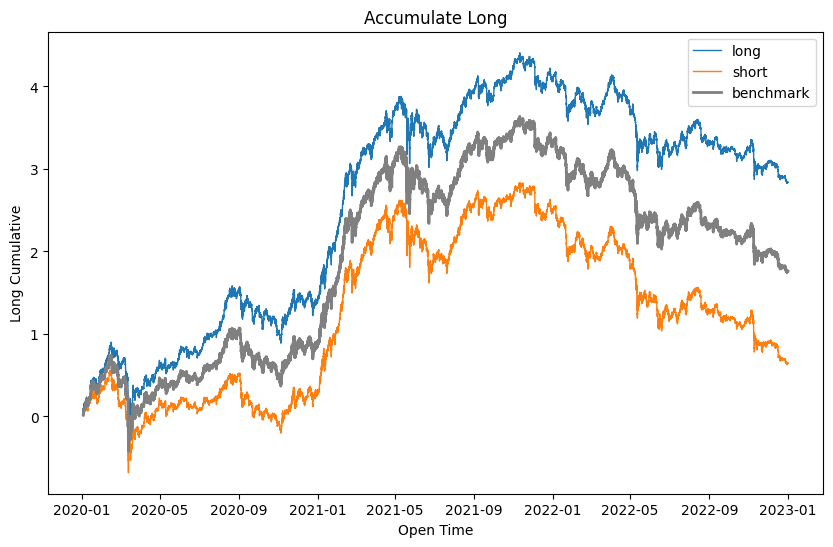

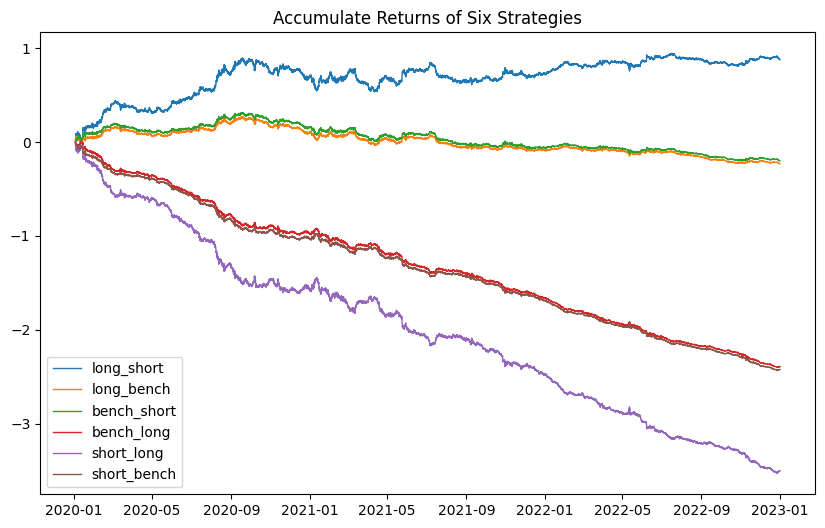

long: 
ann_return = 0.9464  sharpe = 0.8433  maxdd = 0.5839  calmar_ratio = 1.6206  

short: 
ann_return = 0.2158  sharpe = 0.2018  maxdd = 0.7962  calmar_ratio = 0.271  

bench: 
ann_return = 0.5864  sharpe = 0.5398  maxdd = 0.6718  calmar_ratio = 0.8729  

long_short: 
ann_return = 0.2926  sharpe = 1.0402  maxdd = 0.1907  calmar_ratio = 1.5345  

long_bench: 
ann_return = -0.0781  sharpe = -0.5506  maxdd = 0.3971  calmar_ratio = -0.1965  

bench_long: 
ann_return = -0.7979  sharpe = -5.6293  maxdd = 2.393  calmar_ratio = -0.3335  

short_long: 
ann_return = -1.1686  sharpe = -4.1545  maxdd = 3.546  calmar_ratio = -0.3296  

short_bench: 
ann_return = -0.8087  sharpe = -5.7236  maxdd = 2.4284  calmar_ratio = -0.333  

bench_short: 
ann_return = -0.0673  sharpe = -0.4767  maxdd = 0.3927  calmar_ratio = -0.1715  



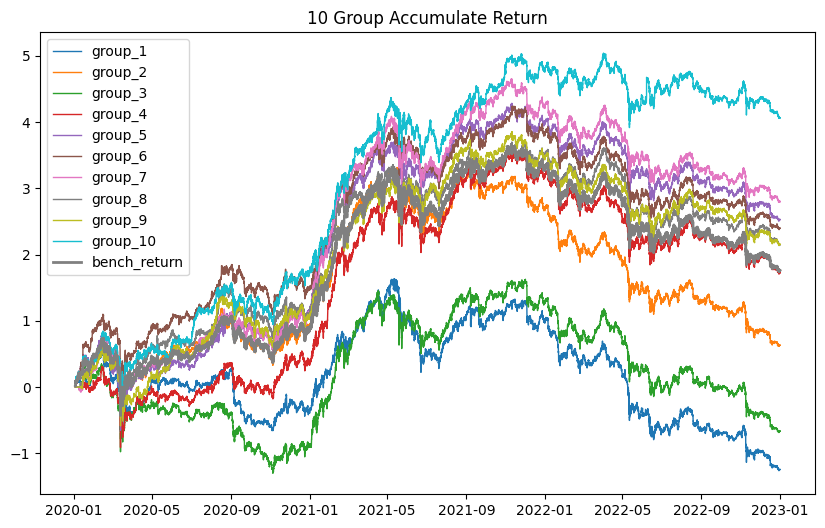

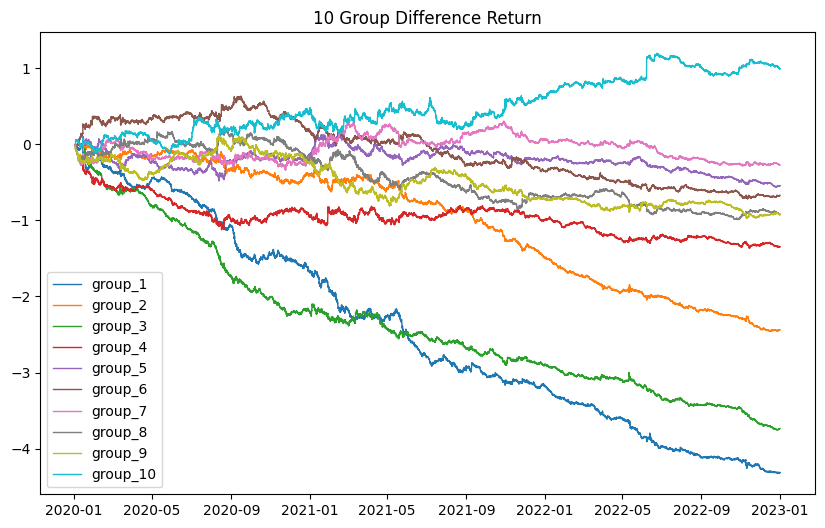

group_1: 
ann_return = -0.4154  sharpe = -0.385  maxdd = 1.0996  calmar_ratio = -0.3777  

group_2: 
ann_return = 0.2107  sharpe = 0.1907  maxdd = 0.7016  calmar_ratio = 0.3003  

group_3: 
ann_return = -0.2225  sharpe = -0.2  maxdd = 1.2234  calmar_ratio = -0.1818  

group_4: 
ann_return = 0.5751  sharpe = 0.5103  maxdd = 0.9335  calmar_ratio = 0.6161  

group_5: 
ann_return = 0.8429  sharpe = 0.7483  maxdd = 0.8057  calmar_ratio = 1.0462  

group_6: 
ann_return = 0.799  sharpe = 0.6981  maxdd = 0.5312  calmar_ratio = 1.5042  

group_7: 
ann_return = 0.9323  sharpe = 0.8118  maxdd = 0.6631  calmar_ratio = 1.4059  

group_8: 
ann_return = 0.7159  sharpe = 0.6193  maxdd = 0.5852  calmar_ratio = 1.2234  

group_9: 
ann_return = 0.7181  sharpe = 0.6116  maxdd = 0.7422  calmar_ratio = 0.9675  

group_10: 
ann_return = 1.3553  sharpe = 1.1128  maxdd = 0.5889  calmar_ratio = 2.3013  

-----------------------------------------
group_difference_1: 
ann_return = -1.4398  sharpe = -4.0413  maxdd

In [3]:
from factor_analysis.factor_analysis import FactorAnalysis

# 假设 result_df 和 data 已经被读取
analysis = FactorAnalysis(factors, df)
analysis.run_full_analysis()